# Install libraries

In [ ]:
pip install tensorflow-gpu==1.15

     |████████████████████████████████| 411.5 MB 7.3 kB/s 
     |████████████████████████████████| 3.8 MB 20.4 MB/s 
     |████████████████████████████████| 503 kB 31.4 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=5ecb6e9857cf1cc892c29fd8c566f36b604978ce34db2981606ce295df1364d0
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succe

In [ ]:
pip install keras==2.2.4

     |████████████████████████████████| 312 kB 5.4 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.2.4 which is incompatible.
tensorflow 2.8.0 requires tensorboard<2.9,>=2.8, but you have tensorboard 1.15.0 which is incompatible.


In [ ]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-_7m35abr
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-_7m35abr
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101077 sha256=bc3d17910b1717fd11b97c9a4ae70091b97b9770acea35d0c4da72a374cf2e85
  Stored in directory: /tmp/pip-ephem-wheel-cache-56d578x7/wheels/bb/1f/f2/b57495012683b6b20bbae94a3915ec79753111452d79886abc
Successfully built keras-contrib


# Data loader

In [ ]:
# Maximum length of comment
max_len = 100
# Dimension of embeding vector
embedding_dim = 100
# Max feature
max_feature = 1000

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp "/content/drive/My Drive/tamil_data_complete.tsv" "./tamil_data_complete.tsv"
!cp "/content/drive/My Drive/tamil_data_partial_spans.tsv" "./tamil_data_partial_spans.tsv"
!cp "/content/drive/My Drive/test_data_final.tsv" "./test_data_final.tsv"
!cp "/content/drive/My Drive/glove.twitter.27B.100d.txt" "./glove.twitter.27B.100d.txt"

Mounted at /content/drive


In [ ]:
# Read data
import pandas as pd
from ast import literal_eval

data = pd.read_csv("tamil_data_complete.tsv",sep="\t")
dev = pd.read_csv("tamil_data_partial_spans.tsv",sep="\t")
test = pd.read_csv("test_data_final.tsv",sep="\t")

text_data = data['spans'].values
spans = data['text'].apply(literal_eval)
lbl = [1 if len(s) > 0 else 0 for s in spans]

text_data_test = test['text'].values
# spans_test = test['text'].apply(literal_eval)
test_id = test.index
# lbl_test = [1 if len(s) > 0 else 0 for s in spans_test]

text_data_dev = dev['spans'].values
spans_dev = dev['text'].apply(literal_eval)
dev_id = dev.index
lbl_dev = [1 if len(s) > 0 else 0 for s in spans_dev]

In [ ]:
# Token level 

# TweetTokenizer used for the tokanizetion

from nltk.tokenize import TweetTokenizer
import numpy as np
import spacy

tknzr2 = TweetTokenizer()

def custom_tokenizer(text_data):
    return tknzr2.tokenize(text_data)

## Retrive the toxic word from th given text

def retrieve_word_from_span(lst_span, text):
    i = 0
    token = []
    a = 0

    word = []

    while (i < (len(lst_span) - 1)):
        if (lst_span[i] != (lst_span[i+1]-1)):
            token.append(lst_span[a:(i+1)])
            a = i + 1
        elif i == (len(lst_span) - 2):
            token.append(lst_span[a:i+2])

        i = i + 1

    for t in token:
        word.append(text[t[0]:(t[len(t)-1])+1])

    return word



def span_retrived(text_data, spans):
    token_labels = []

    for i in range(0, len(text_data)):
        token_labels.append(retrieve_word_from_span(spans[i], text_data[i]))
    
    return token_labels

def span_convert(text_data, spans):
    MAX_LEN = 0
    token_labels = []

    for i in range(0, len(text_data)):
        token_labels.append(retrieve_word_from_span(spans[i], text_data[i]))

    lst_seq = []
    for i in range(0, len(text_data)):
        # token = tknzr.tokenize(text_data[i])
        token = custom_tokenizer(text_data[i])
        if len(token) > MAX_LEN:
            MAX_LEN = len(token)
            
        seq = np.zeros(len(token), dtype=int)
        for j in range(0, len(token)):
            for t in token_labels[i]:
                # if token[j] in tknzr.tokenize(t):
                if token[j] in custom_tokenizer(t):
                    seq[j] = 1
        lst_seq.append(seq)     

    return (token_labels, lst_seq)

In [ ]:
from copy import deepcopy

# convert data
data['token'], data['seq'] = span_convert(text_data, spans)
dev['token'], dev['seq'] = span_convert(text_data_dev, spans_dev)
# test['token'], test['seq'] = span_convert(text_data_test, spans_test)

train = deepcopy(data)
data = pd.concat([data, dev])

In [ ]:
train

,spans,text,token,seq
0,Correct. Enga apa military da oodi vilaiyada s...,"[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 4...",[oodi vilaiyada solli tharuvaaaayaa],"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1]"
1,Dei Rajini pavam da ne varaven poraven ellam k...,"[23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3...",[varaven poraven ellam karithuppatha koraiya p...,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]"
2,"Dey dey deyyy,, loosu pasangala,, munna pinna ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[Dey dey deyyy,, loosu pasangala,, pathruking...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, ..."
3,Intha maari comments ku like kekuravangala ind...,"[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 5...",[ india va vittu veliya annupanum],"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]"
4,250 k likes ineram sila arivuketta pundaika it...,"[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 3...",[arivuketta pundaika ithku karanam ],"[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
4811,Ivarukkku eppodhum thalaivar kalaigner lightaa...,"[55, 56, 57, 58, 59, 60, 61, 62]",[gaandu],"[0, 0, 0, 0, 0, 0, 1]"
4812,Trailer Nala irukanu oru than comment pandranu...,"[83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 9...",[yarda nengalam.],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4813,Wigpathy Visay na Padam Flop than ithula Kabal...,"[24, 25, 26, 27, 28, 29, 102, 103, 104, 105, 1...","[Flop t, Vekkam kettavangal]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4814,Vikram ella styleum set aaguthu.. Namba moonji...,"[63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]",[set aagala],"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]"


# Evaluation metric 

In [ ]:
# Evaluation metric

import sys
import os
import os.path
from scipy.stats import sem
import numpy as np
from ast import literal_eval

def f1(predictions, gold):
    """
    F1 (a.k.a. DICE) operating on two lists of offsets (e.g., character).
    >>> assert f1([0, 1, 4, 5], [0, 1, 6]) == 0.5714285714285714
    :param predictions: a list of predicted offsets
    :param gold: a list of offsets serving as the ground truth
    :return: a score between 0 and 1
    """
    if len(gold) == 0:
        return 1. if len(predictions) == 0 else 0.
    if len(predictions) == 0:
        return 0.
    predictions_set = set(predictions)
    gold_set = set(gold)
    nom = 2 * len(predictions_set.intersection(gold_set))
    denom = len(predictions_set) + len(gold_set)
    return float(nom)/float(denom)


def evaluate(pred, gold):
    """
    Based on https://github.com/felipebravom/EmoInt/blob/master/codalab/scoring_program/evaluation.py
    :param pred: file with predictions
    :param gold: file with ground truth
    :return:
    """
    # # read the predictions
    # pred_lines = pred.readlines()
    # # read the ground truth
    # gold_lines = gold.readlines()

    pred_lines = pred
    gold_lines = gold

    # only when the same number of lines exists
    if (len(pred_lines) == len(gold_lines)):
        data_dic = {}
        for n, line in enumerate(gold_lines):
            parts = line.split('\t')
            if len(parts) == 2:
                data_dic[int(parts[0])] = [literal_eval(parts[1])]
            else:
                raise ValueError('Format problem for gold line %d.', n)

        for n, line in enumerate(pred_lines):
            parts = line.split('\t')
            if len(parts) == 2:
                if int(parts[0]) in data_dic:
                    try:
                        data_dic[int(parts[0])].append(literal_eval(parts[1]))
                    except ValueError:
                        # Invalid predictions are replaced by a default value
                        data_dic[int(parts[0])].append([])
                else:
                    raise ValueError('Invalid text id for pred line %d.', n)
            else:
                raise ValueError('Format problem for pred line %d.', n)

        # lists storing gold and prediction scores
        scores = []
        for id in data_dic:
            if len(data_dic[id]) == 2:
                gold_spans = data_dic[id][0]
                pred_spans = data_dic[id][1]
                scores.append(f1(pred_spans, gold_spans))
            else:
                sys.exit('Repeated id in test data.')

        return (np.mean(scores), sem(scores))

# Data analysis 

In [ ]:
# Number of training data
print(len(train))

4816


In [ ]:
# Number of test data
print(len(test))

876


In [ ]:
test

,text
0,Evanukachum pondati kolandhainu sentiment irun...
1,Adei ennada short film la irunthu suturukinga
2,Super dialogue Oruthar mela visvasam kattrath...
3,Epadiya jathi padam. Ponnu padama edungada. In...
4,Ponnu mella kaivaikuravan Kai mattum illa uyir...
...,...
871,காலா.காபலி.அசுரன்.பாரியேரும்.பெருமள் வந்த அப்ப...
872,Kekka bekka short film mathri irukey
873,Bayangaram... Trailerey ippadina appa Padam en...
874,komali rasini vesam pottu tamil ilichavayangal...


In [ ]:
# Show example of training data
train.tail(20)

,spans,text,token,seq
4796,ithu yennai arindhal movie yoda copy....amai k...,"[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 3...","[movie yoda copy., amai kunjungala ]","[0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, ..."
4797,Heh!! Vedalam teasar ahh break pannitom,"[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 3...",[break pannitom],"[0, 0, 0, 0, 0, 0, 1, 1]"
4798,Opening nalla than iruku finishing nenachathan...,"[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 3...",[finishing nenachathan bayama iruku],"[0, 0, 0, 1, 1, 1, 1, 1]"
4799,ena da idhu views likes lam paths parithabama ...,"[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...","[ parithabama irukuuu.., aamais]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ..."
4800,00:24 oru nadigaiya paarthu kekkura kelvija thala,"[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...",[oru nadigaiya paarthu kekkura kelvija ],"[0, 1, 1, 1, 1, 1, 0]"
4801,Enna da bgm viswasam NKP bgm Mari irukuthu,"[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 2...",[viswasam NKP bgm Mari irukuthu],"[0, 0, 1, 1, 1, 1, 1, 1]"
4802,Anga thala mattum enatha puthusa panitaru....b...,"[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 2...",[ enatha puthusa panitaru.],"[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]"
4803,VANTHUTHENU SOLLU THIRIMPI VANTHENU 20 VARUCHU...,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 4...",[20 VARUCHUTHAKU MUNNADI EPIDI PONNENU APIDIYE...,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ..."
4804,Namaku thaviyanatha nama than adichi vanganum,"[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 4...",[adichi vanganum],"[0, 0, 0, 0, 1, 1]"
4805,Namaku yadhuku indha tava illadha vala... Mr....,"[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 3...",[tava illadha vala..],"[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]"


In [ ]:
# counting word in spans for train 
len_span = train['token'].apply(len)

In [ ]:
# counting word in spans for test 
# len_span_test = test['token'].apply(len)

In [ ]:
# Statistic spans by number of word in span for train
# number of toxic words in an input sentence (ranges from 1 to 10)
len_span.value_counts(normalize=True, sort=True)

1     0.787998
2     0.167774
3     0.034468
4     0.005814
5     0.002699
6     0.000623
10    0.000415
7     0.000208
Name: token, dtype: float64

In [ ]:
# Statistic spans by number of word in span for test 
# len_span_test.value_counts(normalize=True, sort=True)

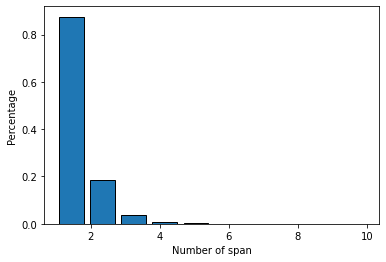

In [ ]:
# Distribution histogram plot
import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline

fig, ax = plt.subplots()

ax.hist(len_span, density=True, edgecolor='k', rwidth=0.8)  # density=False would make counts

plt.ylabel('Percentage')
plt.xlabel('Number of span');

# Word embedding

In [ ]:
# Read embedding
word_dict = []
embeddings_index = {}
f = open('glove.twitter.27B.100d.txt')
for line in f:
    values = line.split(' ')
    word = values[0] 
    word_dict.append(word)
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('GloVe data loaded')


GloVe data loaded


In [ ]:
words = word_dict
num_words = len(words)

# Dictionary word:index pair
# word is key and its value is corresponding index
word_to_index = {w : i + 2 for i, w in enumerate(words)}
word_to_index["UNK"] = 1
word_to_index["PAD"] = 0

# Dictionary lable:index pair
idx2word = {i: w for w, i in word_to_index.items()}

In [ ]:
num_words

1193514

In [ ]:
# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_to_index.items():
    if i > max_feature:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

In [ ]:
 # mapping for token cases
case2Idx = {'1': 1, '0': 0}
caseEmbeddings = np.identity(len(case2Idx), dtype='float32')  # identity matrix used 

char2Idx = {"PADDING": 0, "UNKNOWN": 1}
for c in " 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ.,-_()[]{}!?:;#'\"/\\%$`&=*+@^~|<>":
    char2Idx[c] = len(char2Idx)

# Data pre-processing 

In [ ]:
from sklearn.model_selection import train_test_split

y = data['seq']
X = data['spans']

y_dev = dev['seq']
X_dev = dev['spans']

# y_test = test['seq']
X_test = test['text']

In [ ]:
#train test
from sklearn.model_selection import train_test_split

X_train, X_dev1, y_train, y_dev1 = train_test_split(X, y, test_size = 0.1)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer


from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.initializers import Constant
from nltk.corpus import stopwords
import re
import numpy as np

tknzr2 = TweetTokenizer()

def custom_tokenizer(text_data):
    text_data = text_data.lower()
    return tknzr2.tokenize(text_data)

def preprocess(text):
    text = text.lower()

    word_list = nltk.word_tokenize(text)
    lemma = WordNetLemmatizer()

    for w in word_list:
        w = lemma.lemmatize(w)

    new_text = ""
    for w in word_list:
        new_text = new_text + " " + w

    return new_text

def encoding(X, y, isTest = True):
    sentences = []
    
    for t in X:
        sentences.append(custom_tokenizer(t))

    X = []
    for s in sentences:
        sent = []
        for w in s:
            try:
                w = w.lower()
                sent.append(word_to_index[w])
            except:
                sent.append(word_to_index["UNK"])
        X.append(sent)
           
    X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_to_index["PAD"])

    if isTest:
        y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=word_to_index["PAD"])
        y = to_categorical(y, num_classes=2)
    else:
        y = None

    return (X,y)


def decoding(text_data, encoding_text, prediction):
    test = [[idx2word[i] for i in row] for row in encoding_text]

    lst_token = []

    for t in range(0, len(test)):
        yy_pred = []
        for i in range(0, len(test[t])):
            if prediction[t][i] == 1:
                yy_pred.append(test[t][i])
        lst_token.append(yy_pred)

    lis_idx = []
    for i in range(0, len(text_data)):
        idx = []
        for t in lst_token[i]:
            index = text_data[i].find(t)
            idx.append(index)
            for j in range(1, len(t)):
                index = index + 1
                idx.append(index)
        lis_idx.append(idx)

    return lis_idx

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Using TensorFlow backend.


In [ ]:
X1, y1 = encoding(X_train, y_train)
X2, y2 = encoding(X_dev1, y_dev1)

# **BiLSTM - CRF**

In [ ]:
y_train

2427                       [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
3144                          [0, 1, 1, 0, 0, 1, 1, 1, 1]
4616           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
1522                                [0, 1, 0, 0, 0, 0, 0]
2600    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
4108                             [1, 1, 1, 1, 0, 0, 0, 0]
3362    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
98      [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...
1530                                   [0, 0, 1, 1, 1, 0]
4246                    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Name: seq, Length: 6729, dtype: object

In [ ]:
# BiLSTM - CRF 
from keras.layers import LSTM, Dense, TimeDistributed, Embedding, Bidirectional, Flatten, Dropout
from keras.models import Model, Input
from keras_contrib.layers import CRF
# from tensorflow_addons.layers import crf
from keras.utils.vis_utils import plot_model

import warnings
warnings.filterwarnings("ignore")


# from keras.metrics import BinaryAccuracy, Precision, Recall, AUC

input = Input(shape = (max_len,))
model = Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_len,
                    trainable=True)(input)

model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units = max_len, return_sequences=True, recurrent_dropout=0.1))(model)
model = TimeDistributed(Dense(max_len, activation="relu"))(model)
crf = CRF(2)  
out = crf(model)  # output


model = Model(input, out)
model.compile(optimizer="adam", loss=crf.loss_function, metrics=['accuracy'])

model.summary()

plot_model(model,to_file="bilstm-crf.pdf",show_shapes=True,show_layer_names=True)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 100)          119351400 
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 200)          160800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 100, 100)          20100     
____________________________________________________________

In [ ]:
from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")

checkpointer = ModelCheckpoint(filepath = 'drive/My Drive/CODE/SemVal/model/model_detection_19.h5',
                       verbose = 0,
                       mode = 'auto',
                       save_best_only = True,
                       monitor='val_loss')

model.fit(X1, np.array(y1), batch_size=64, epochs=1, validation_data=(X2, y2), callbacks=[checkpointer])




Train on 6729 samples, validate on 748 samples
Epoch 1/1





6729/6729 [==============================] - 90s 13ms/step - loss: 0.1131 - acc: 0.9567 - val_loss: 0.1065 - val_acc: 0.9551


In [ ]:
## Pridection On Test Data

X3, y3 = encoding(X_test,None,isTest = False)

In [ ]:
y_pred = model.predict(X3)
y_pred = np.argmax(y_pred, axis=-1)
# y_test_true = np.argmax(y3, -1)
raw_y = decoding(X_test, X3, y_pred)

In [ ]:
X4, y4 = encoding(X_dev,y_dev)

In [ ]:
y_pred_dev = model.predict(X4)
y_pred_dev = np.argmax(y_pred_dev, axis=-1)
raw_dev = decoding(X_dev, X4, y_pred_dev)

In [ ]:
f1(raw_dev[0], spans_dev[0])

acc = []
for i in range(0, len(spans_dev)):
    acc.append(f1(raw_dev[i], spans_dev[i]))

print(np.mean(acc)*100)

12.870293332462415


In [ ]:
new_sub = pd.DataFrame({'text': text_data_test, 'spans': raw_y})

new_sub.to_csv('drive/My Drive/CODE/SemVal/test_demo_detection.csv',sep="\t", index=False)